<a href="https://colab.research.google.com/github/fadi-theodory/Prediction-of-Product-Sales/blob/main/Copy_of_Project_1_Part_2_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Data**

In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)


In [350]:
fpath="/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df=pd.read_csv(fpath)


In [351]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# **Data Cleaning**

1) How many rows and columns?

` there are 8523 rows and 12 columns`

2) What are the datatypes of each variable?

` we have numbers (float and int) and objects`


In [353]:
df.duplicated().sum()



np.int64(0)

3) Are there duplicates? If so, drop any duplicates.

`no duplicates`


In [354]:
null_sums=df.isna().sum()
null_sums

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


<Axes: >

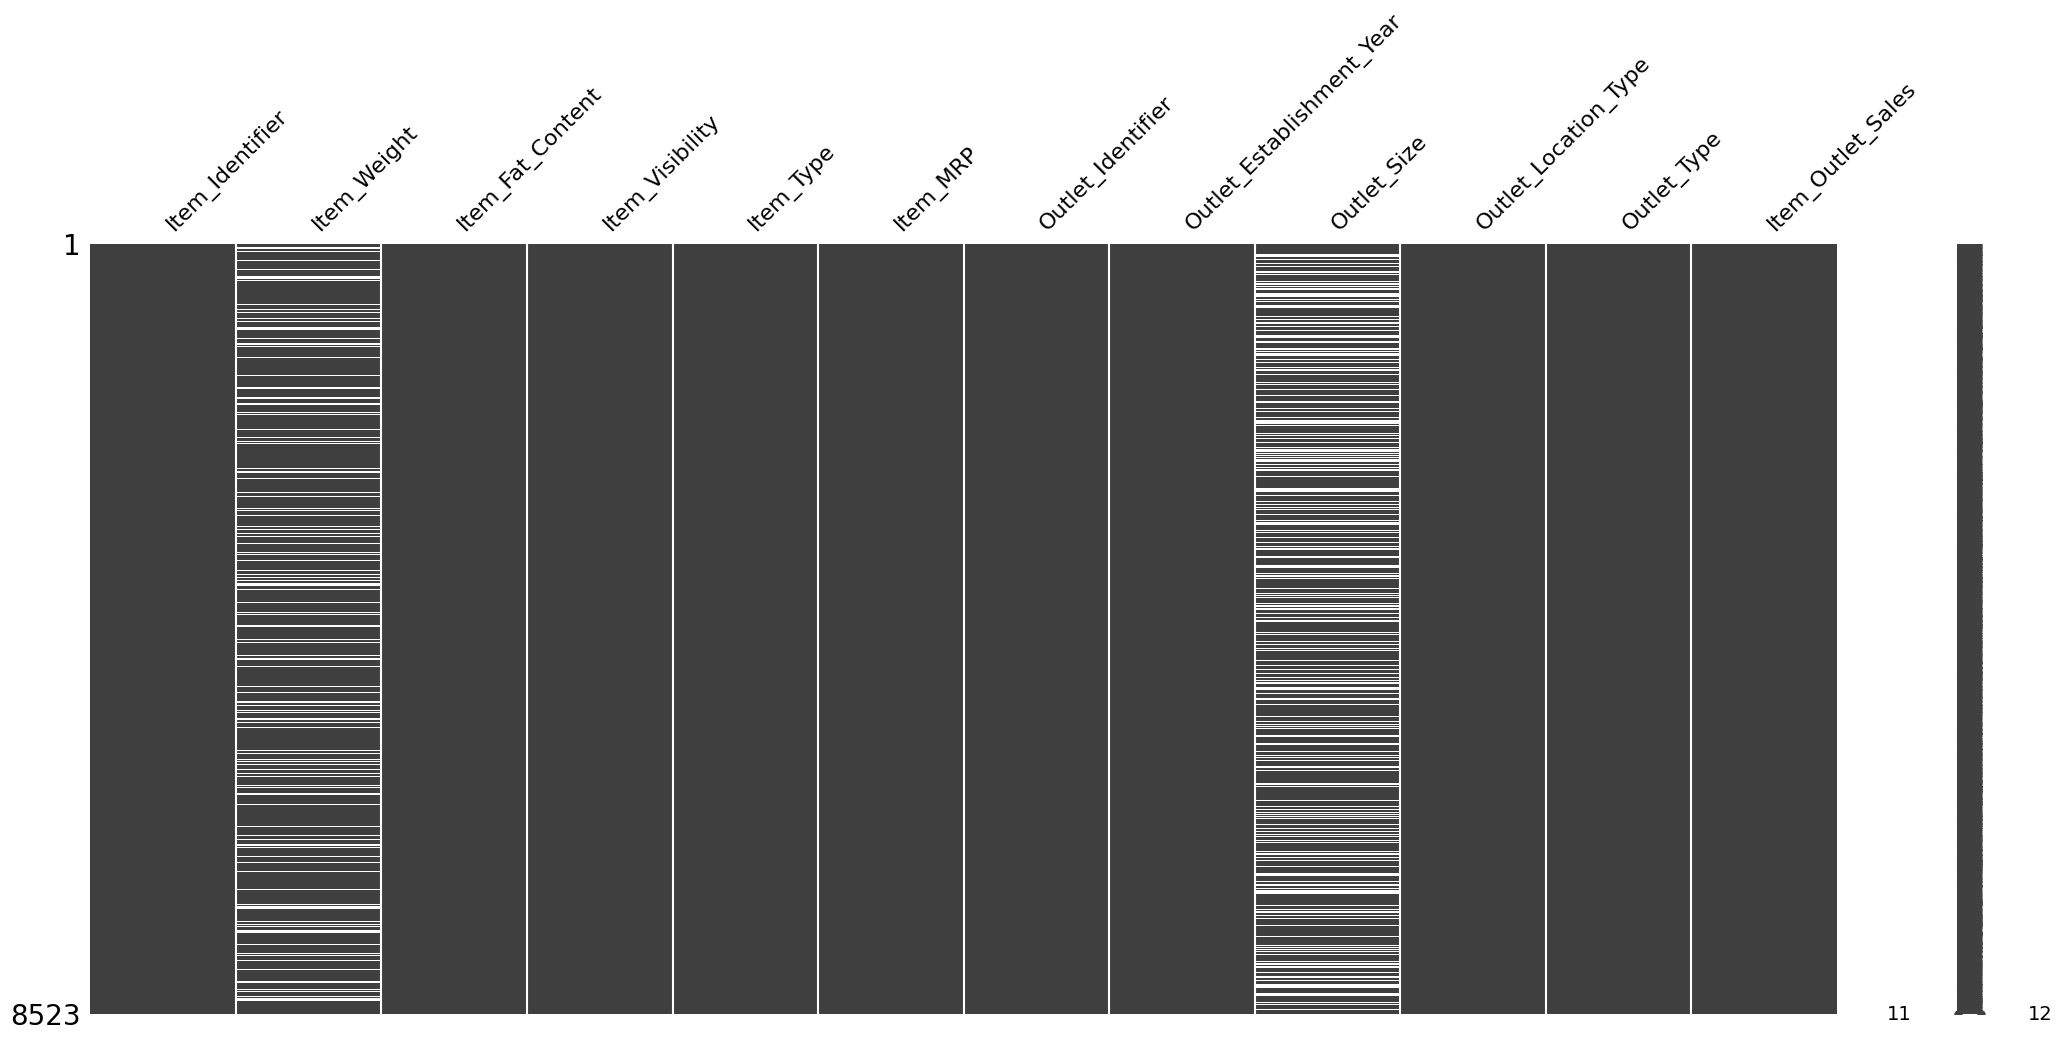

In [355]:
import missingno as msno
msno.matrix(df)

4) Identify missing values.

` the outlet size and the item weight`

In [356]:
df.dtypes =="object"

,0
Item_Identifier,True
Item_Weight,False
Item_Fat_Content,True
Item_Visibility,False
Item_Type,True
Item_MRP,False
Outlet_Identifier,True
Outlet_Establishment_Year,False
Outlet_Size,True
Outlet_Location_Type,True


In [357]:
#for the item weight, we will replace the missing values with the mean
# we will check the mean first
# we will get the mean of each item type
item_weight_mean = df.groupby("Item_Type")["Item_Weight"].mean()
item_weight_mean

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [358]:
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('mean'))

df["Item_Weight"].value_counts()

,count
Item_Weight,
13.224769,213
12.987880,212
13.384736,151
12.867061,138
13.426069,116
...,...
6.895000,2
9.420000,1
7.685000,1


<Axes: >

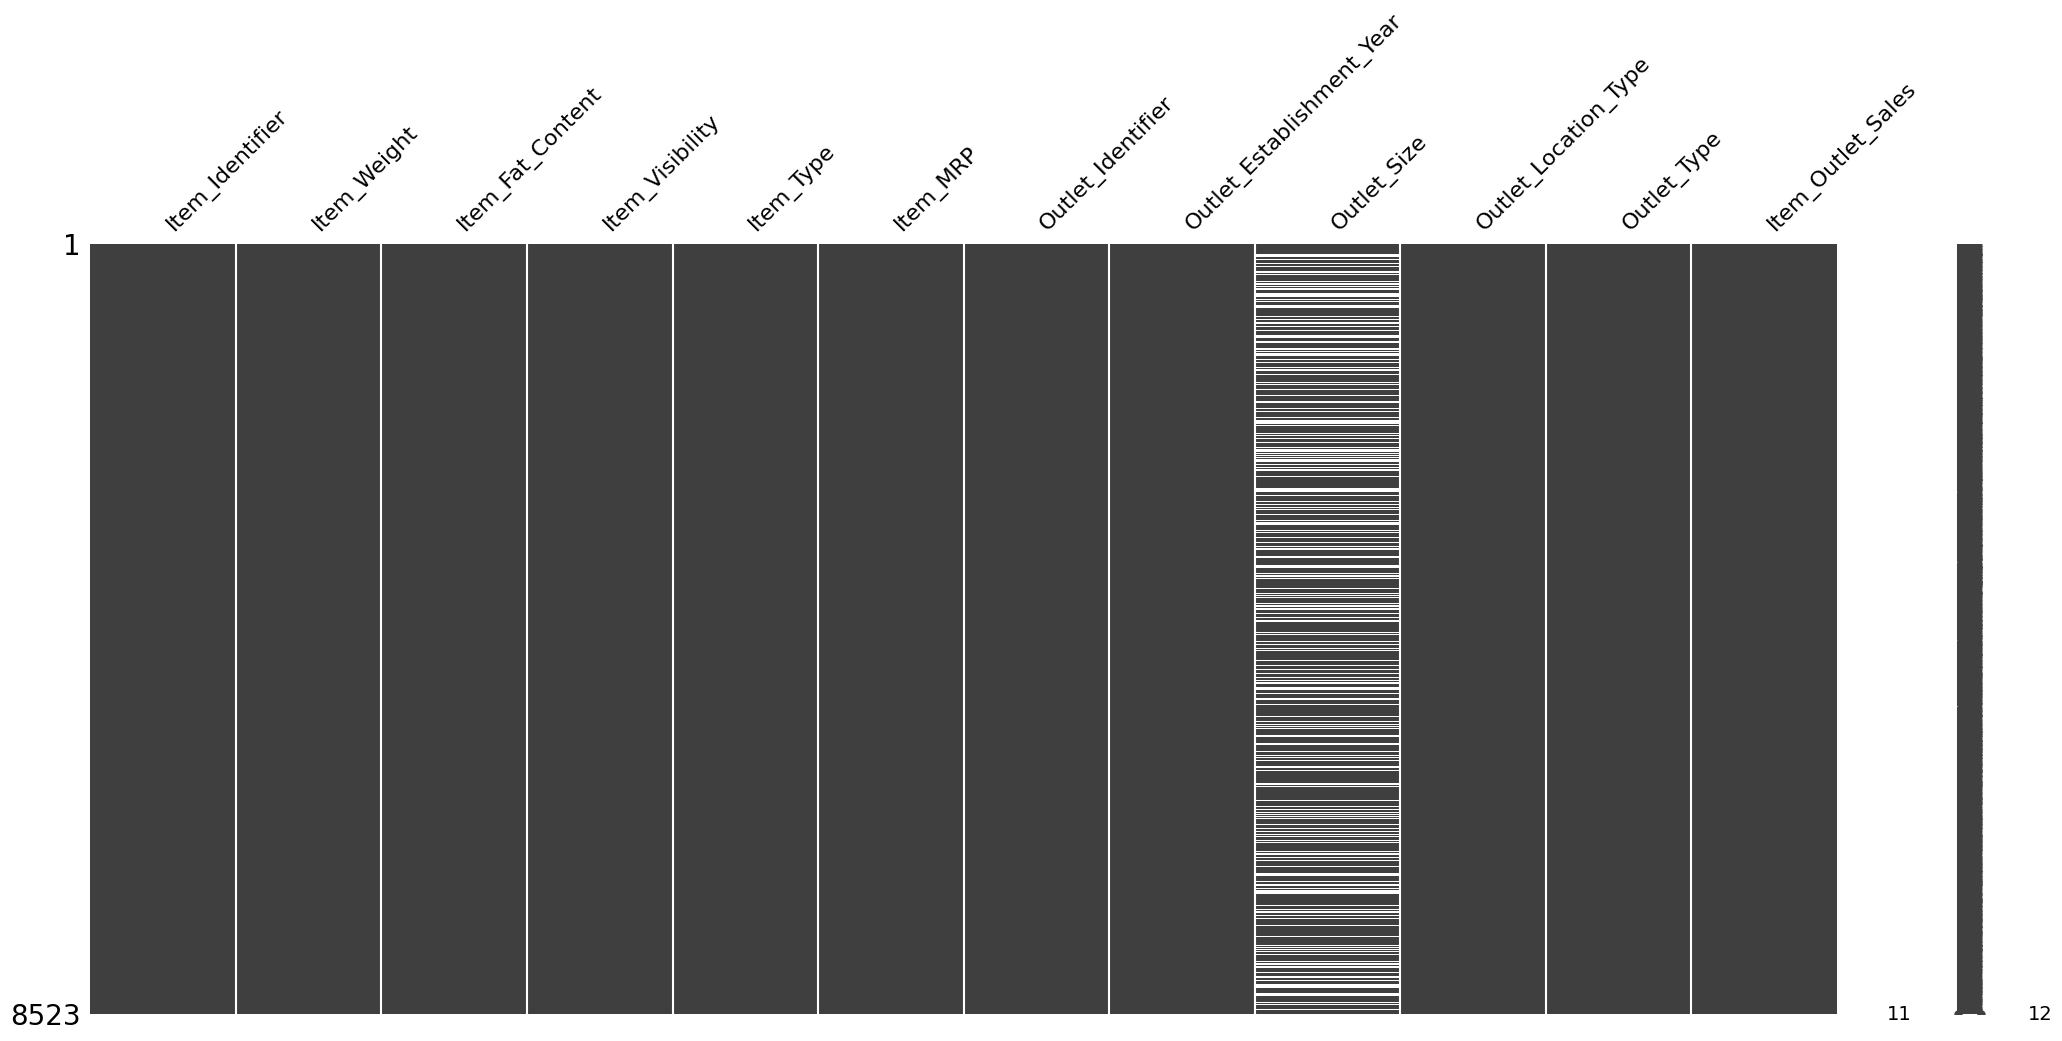

In [359]:
msno.matrix(df)

In [360]:
df["Item_Weight"].isna().sum()

np.int64(0)

In [361]:
#outlet size is a string, so we will change the null to missing
df["Outlet_Size"]=df["Outlet_Size"].fillna("Missing")
df["Outlet_Size"].value_counts()

,count
Outlet_Size,
Medium,2793
Missing,2410
Small,2388
High,932


In [362]:
# to check if there are any other null items
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


<Axes: >

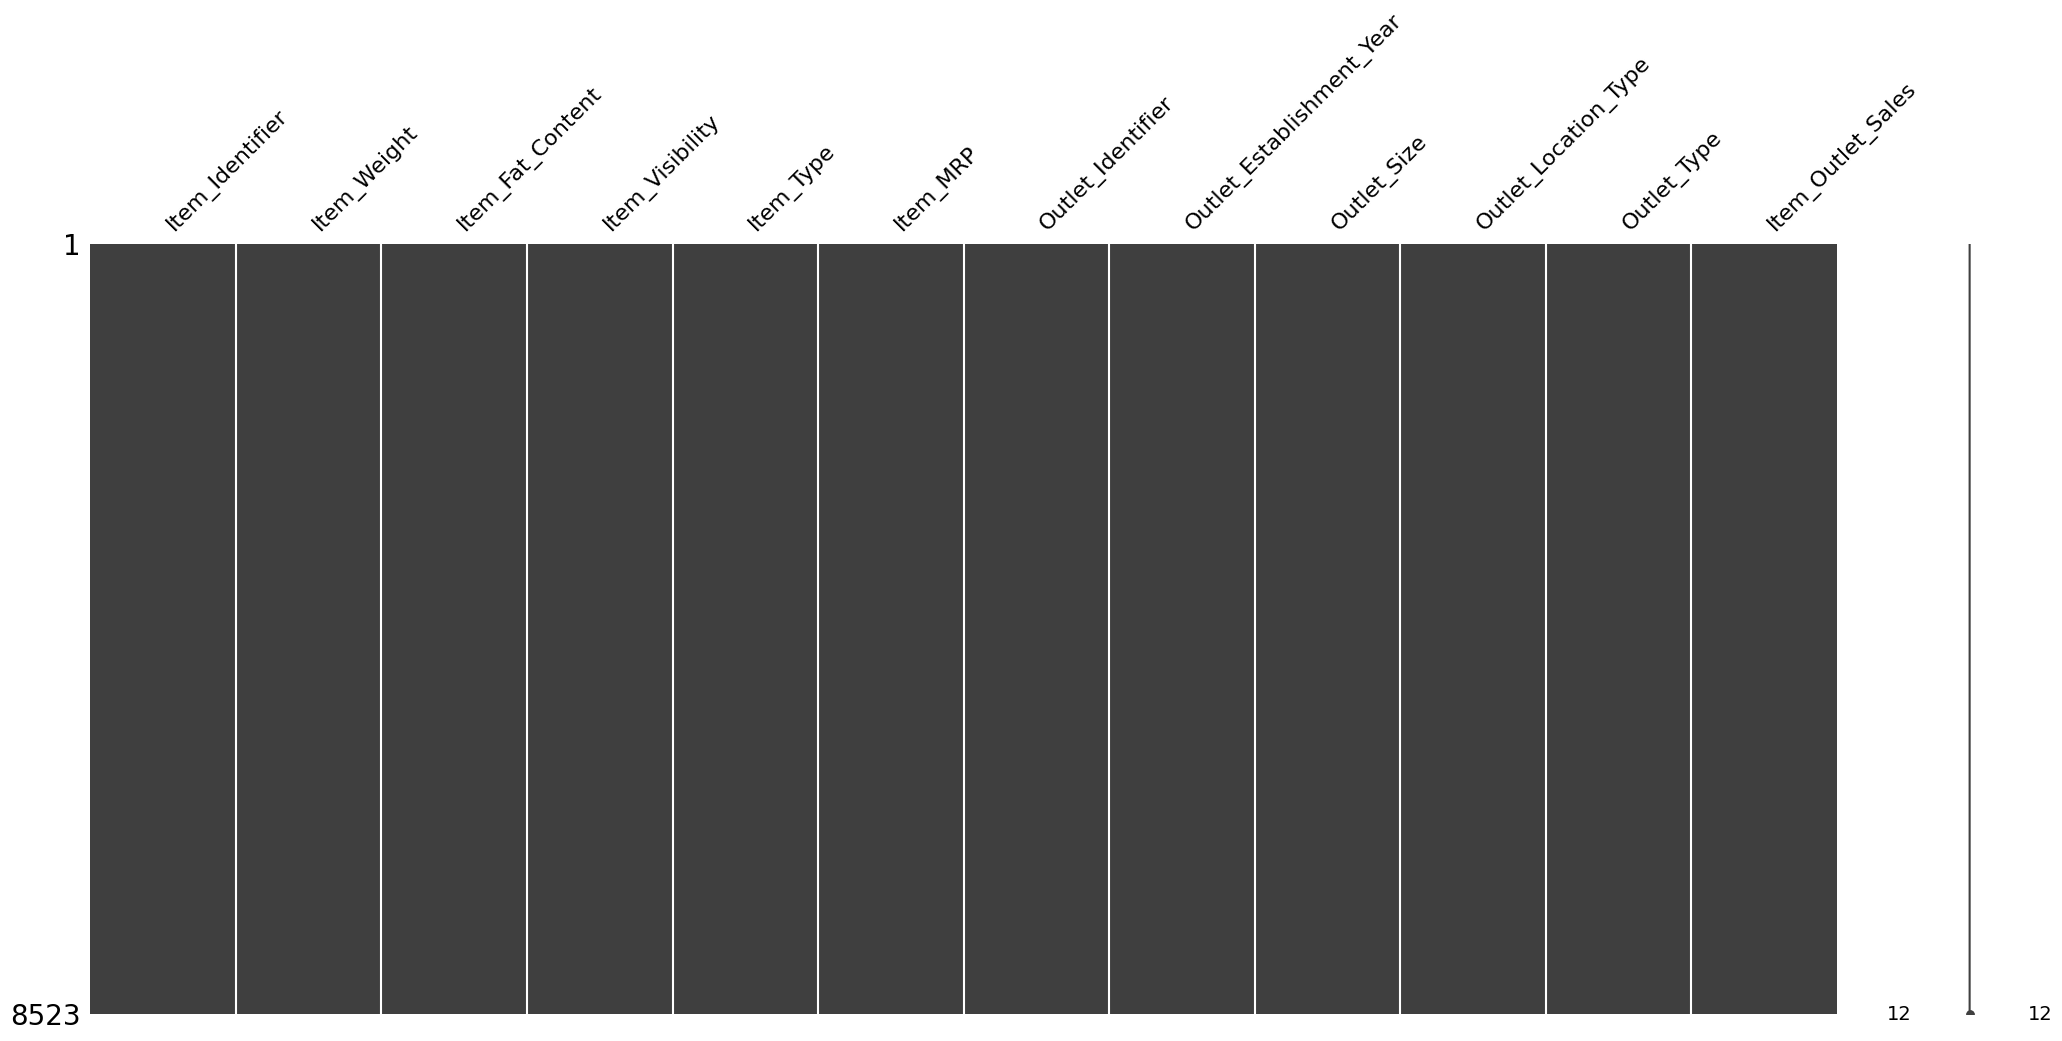

In [363]:
msno.matrix(df)

In [364]:
# to fix the data, we will first check the value counts for all columns, so we will use for
for col in df.columns:
  print(col)
  print(df[col].value_counts())
  print ("\n")

Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Item_Weight
Item_Weight
13.224769    213
12.987880    212
13.384736    151
12.867061    138
13.426069    116
            ... 
6.895000       2
9.420000       1
7.685000       1
6.520000       1
5.400000       1
Name: count, Length: 431, dtype: int64


Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Item_Visibility
Item_Visibility
0.000000    526
0.076975      3
0.061271      2
0.046825      2
0.112399      2
           ... 
0.054142      1
0.018920      1
0.044974      1
0.103611      1
0.083060      1
Name: count, Length: 7880, dtype: int64


Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy     

In [365]:
# we found that Item fat content is not consistent
df["Item_Fat_Content"].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [366]:
# we need to change low fat and LF to Low Fat and reg to Regular
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace("low fat","Low Fat")
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace("LF","Low Fat")
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace("reg","Regular")
df["Item_Fat_Content"].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [367]:
num_cols=df.select_dtypes(include="number")
num_cols.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [368]:
for x in num_cols:
  print(x)
  print(num_cols[x].describe())
  print("\n")

Item_Weight
count    8523.000000
mean       12.857890
std         4.232804
min         4.555000
25%         9.310000
50%        12.867061
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64


Item_Visibility
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


Item_MRP
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


Outlet_Establishment_Year
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64


Item_Outlet_Sales
count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000


Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

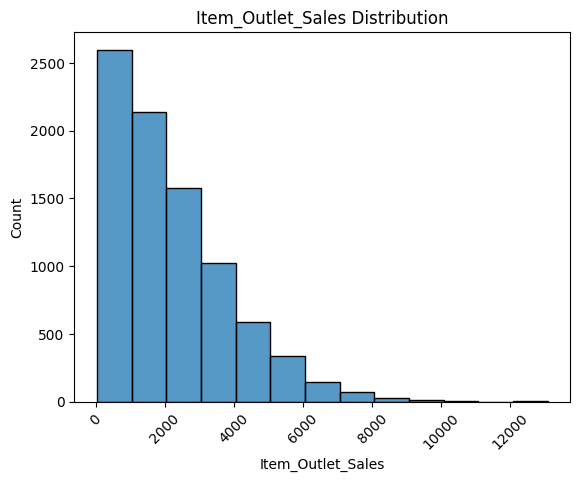

In [369]:

ax = sns.histplot(data=df, x='Item_Outlet_Sales',binwidth=1000)
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title('Item_Outlet_Sales Distribution')




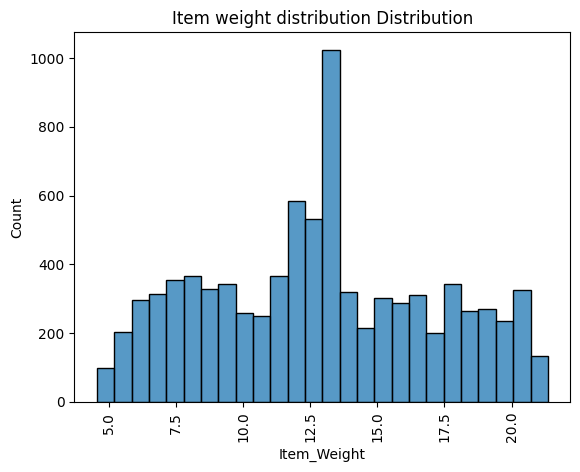

In [370]:

ax = sns.histplot(data=df, x='Item_Weight')
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 90);
ax.set_title('Item weight distribution Distribution');

# Boxplots

this shows the distribution of sales amounts, we can see the median is less than 2000 by a little.
ina ddiotn there are some outliers

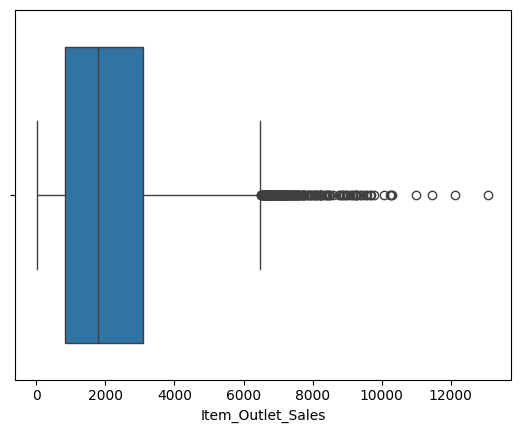

In [371]:
ax = sns.boxplot(data=df, x="Item_Outlet_Sales")

Box plot to see where do we stand in the visiblity of products

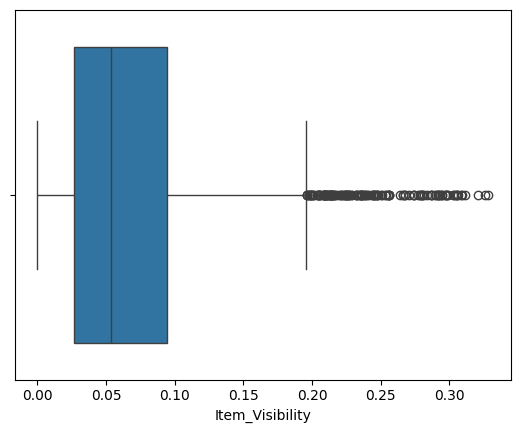

In [372]:
ax = sns.boxplot(data=df, x="Item_Visibility")

most of the items' visibility is low

# The following is to check the MRP(Maximum Retail Price (list price) of the product)

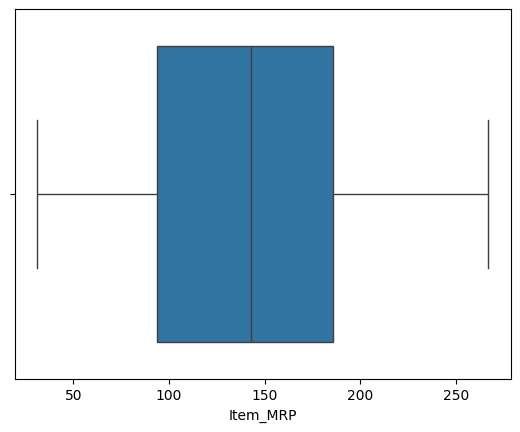

In [373]:
ax = sns.boxplot(data=df, x="Item_MRP")

`we can see that most of the items' max amount is in the middle `

# Heatmap to view the correlation between features.


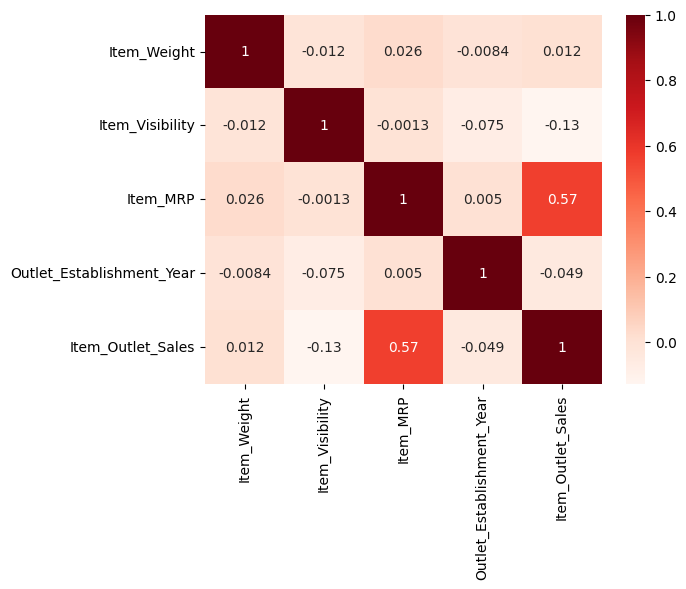

In [374]:
# Create a fig, ax with a figsize argument
corr = df.corr(numeric_only = True)
corr.round(2)

fig, ax = plt.subplots()
sns.heatmap(corr, cmap = 'Reds', annot = True, ax=ax);


` the strongest correlation as we can see is between ITM MRP and Item outlet sales `
` we can see that there is a correlation, a weak one -.13 between visibility and sales `

# Countplots to view the frequency of each class of categorial features in your dataset.


In [375]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


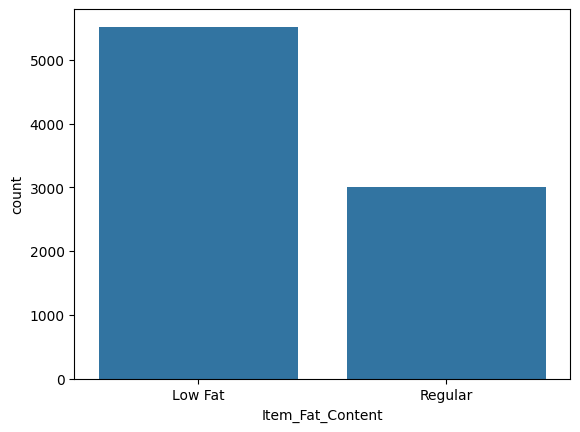

In [376]:
ax = sns.countplot(data=df, x="Item_Fat_Content");

` we can see that the count of sales for low fat is higher than regular `

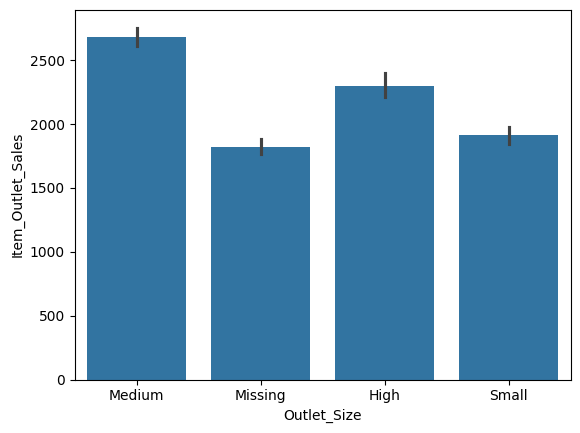

In [377]:
ax = sns.barplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales')

` we note that the medium outlet has the highest sales `

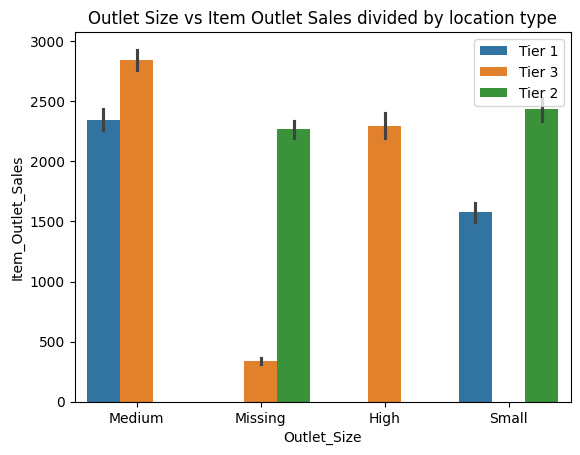

In [378]:
ax = sns.barplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales', hue = "Outlet_Location_Type")
ax.set_title("Outlet Size vs Item Outlet Sales divided by location type")
ax.legend(loc=1);

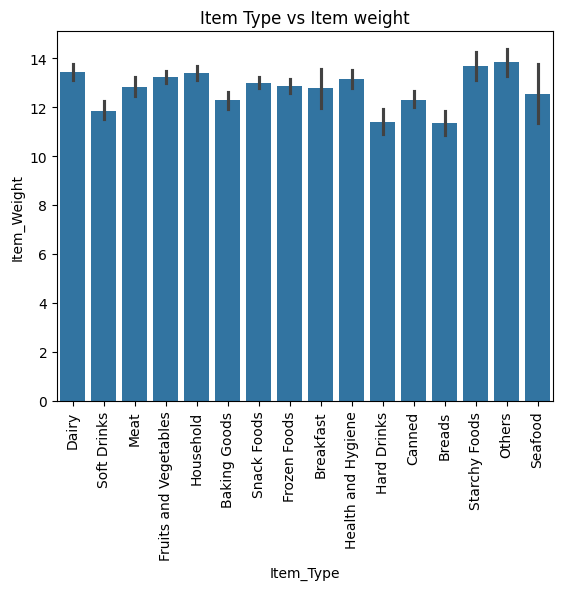

In [379]:
ax = sns.barplot(data=df, x='Item_Type', y='Item_Weight')
ax.set_title("Item Type vs Item weight")
ax.tick_params(axis='x', rotation = 90);


# we want to know which columns have the word missing

In [380]:
# to know which columns have the word "Missing", we will first check the value counts for all columns, so we will use for
for col in df.columns:
  print(col)
  print(df[col].value_counts())
  print ("\n")

Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Item_Weight
Item_Weight
13.224769    213
12.987880    212
13.384736    151
12.867061    138
13.426069    116
            ... 
6.895000       2
9.420000       1
7.685000       1
6.520000       1
5.400000       1
Name: count, Length: 431, dtype: int64


Item_Fat_Content
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64


Item_Visibility
Item_Visibility
0.000000    526
0.076975      3
0.061271      2
0.046825      2
0.112399      2
           ... 
0.054142      1
0.018920      1
0.044974      1
0.103611      1
0.083060      1
Name: count, Length: 7880, dtype: int64


Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    64

In [381]:
# it is only the Outlet_size that has Missing placeholder, we will replace it
filter_outletsize_miss= df['Outlet_Size'] == "Missing"

filter_outletsize_miss.sum()

np.int64(2410)

In [382]:
# Replacing Missing in outlet size with null values
df.loc[filter_outletsize_miss,'Outlet_Size'] = np.nan
filter_outletsize_miss.sum()


np.int64(2410)

In [383]:
# we can see that the outlet size non null is returned to the origianl
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [384]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [385]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

In [386]:
target = "Item_Outlet_Sales"

### Example: {Item Weight}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  

In [387]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df[feature].dtype

dtype('float64')

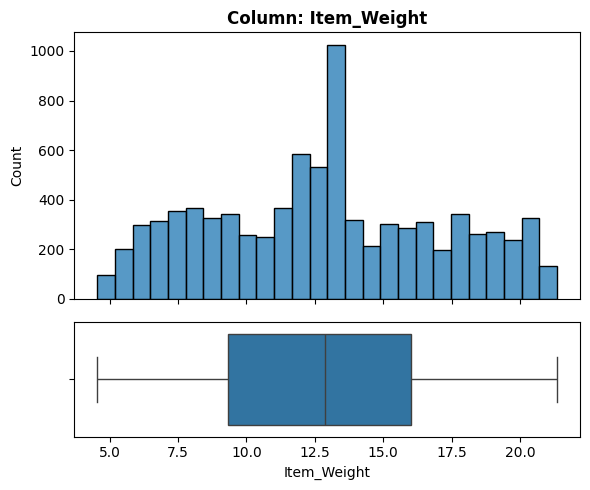

- NaN's Found: 0 (0.0%)
- Unique Values: 431
- Most common value: '13.224769381746812' occurs 213 times (2.5%)
- Not constant or quasi-constant.


In [388]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - `Numeric`

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - `No Null Values, nothing to do`

3. Is the feature constant or quasi-constant?
  - `Neither constant nor quasi constant`

4. What is the cardinality? Is it high?
  - `Numerical, not applicable`

5. Would we know this BEFORE the target is determined?
  - `Yes`

6. Is there a business case/understanding reason to exclude based on our business case?
  - `no`



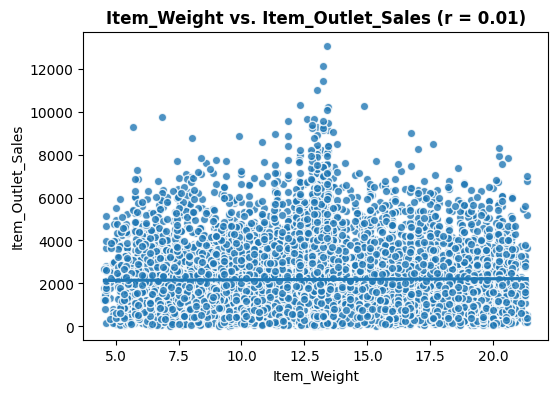

In [389]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature,target);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Absolutely not`?
  - Does this feature appear to be a predictor of the target?
    - `No, there is not correlation between weight and sales, r=.01 which is very weak. ` ?

___

### Example: {Item_Fat_Content}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  how much fat is in the item. low or regular

In [390]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
df[feature].dtype

dtype('O')

<ipython-input-384-bb05217bb22a>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


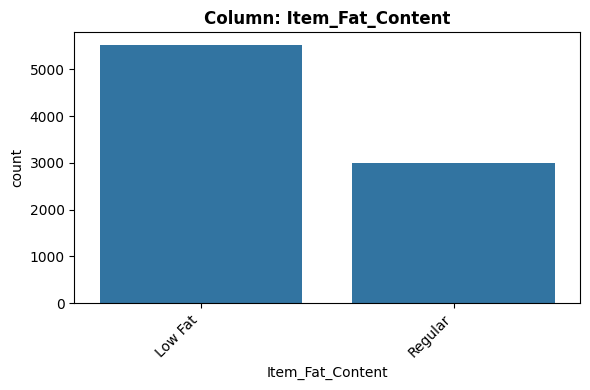

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [391]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - `categorical`

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - ` no null values, nothing to do `

3. Is the feature constant or quasi-constant?
  - `neither`

4. What is the cardinality? Is it high?
  - `no, only two features`

5. Would we know this BEFORE the target is determined?
  - `yes`

6. Is there a business case/understanding reason to exclude based on our business case?
  - `no`



<ipython-input-385-b47f611e8b80>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


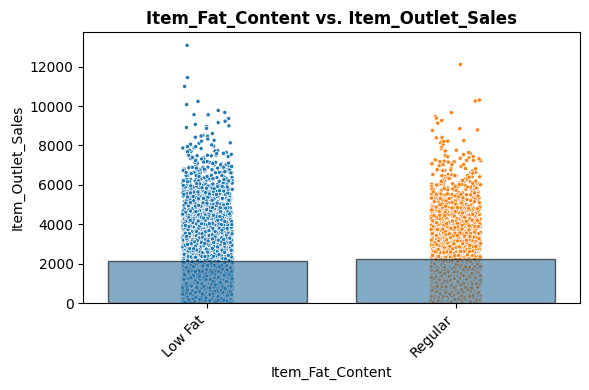

In [392]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,target);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `no, we can see that the mean of sales is almost the same, and even the scattering above, it has the same clustering`?
  - Does this feature appear to be a predictor of the target?
    - `No, we can see that the mean of sales is almost the same, and even the scattering above, it has the same clustering` ?

___

In [393]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,1997.831867,2181.288914
std,4.232804,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.867061,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Example: { Item_Visibility}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  The percentage of total display area of all products in a store allocated to the particular product
  it is numerical

In [394]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
df[feature].dtype

dtype('float64')

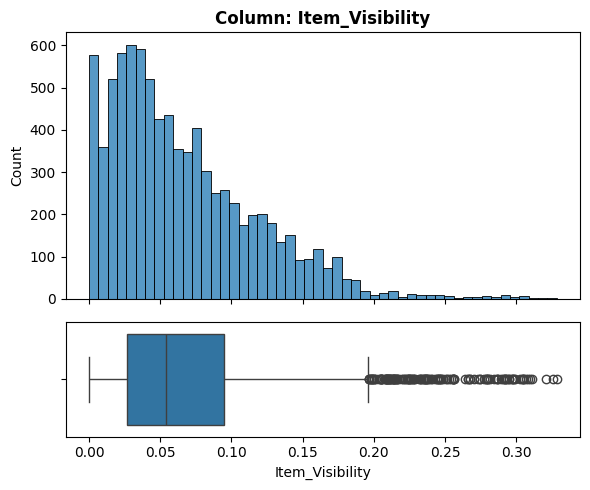

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [395]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0, no need

3. Is the feature constant or quasi-constant?
  - neither

4. What is the cardinality? Is it high?
  - numeric, not applicable

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



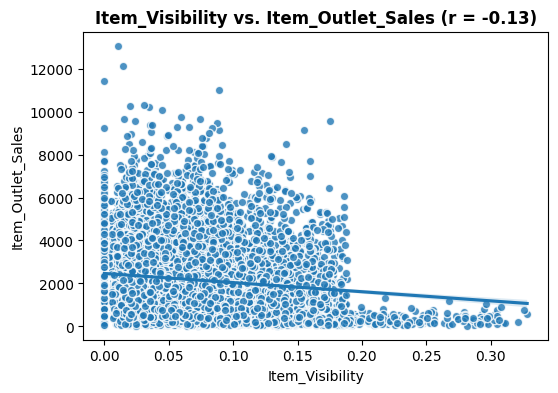

In [396]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature,target);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `the correlation is negative, but weak. however we can see that the more visible the item, the less sales, which would contradict to logic. However, we will use it to as a predictor`?
  - Does this feature appear to be a predictor of the target?
    - `No, with correlation as weak as .13, we cant rely on it` ?

___

In [397]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Example: {Item_Type}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  The category to which the product belongs

In [398]:
# # Confirming the dtype to select correct EDA function
feature="Item_Type"
df[feature].dtype

dtype('O')

<ipython-input-384-bb05217bb22a>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


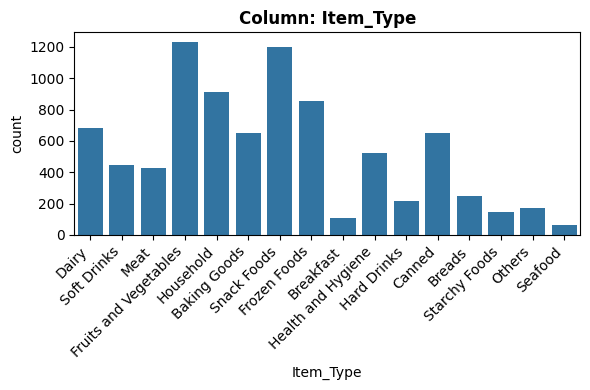

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [399]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 Null, nothing to do

3. Is the feature constant or quasi-constant?
  - neither

4. What is the cardinality? Is it high?
  - since it is more than 10, it is considered high

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



<ipython-input-385-b47f611e8b80>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


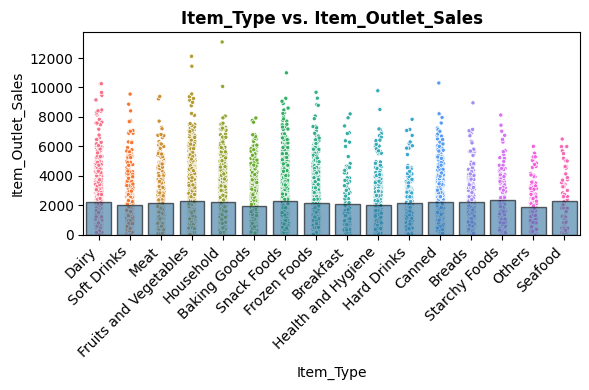

In [400]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,target);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `no. the means are almost equal for all of them, with some values that are higher, but still they have almost the same counts`?
  - Does this feature appear to be a predictor of the target?
    - `No` ?

___

### Example: {Item_MRP}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  Maximum Retail Price (list price) of the product

In [401]:
# # Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

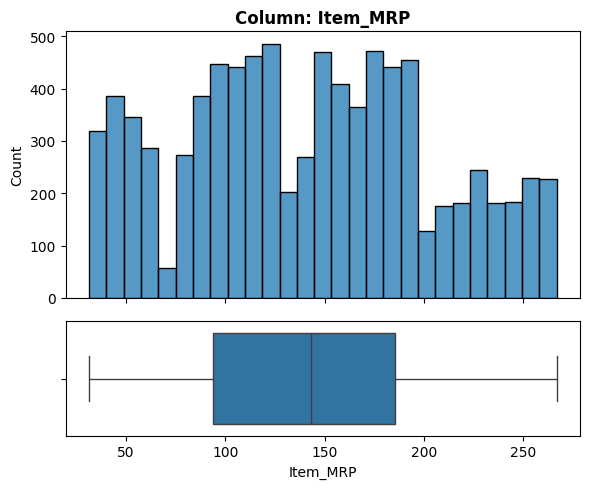

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [402]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 nulls

3. Is the feature constant or quasi-constant?
  - neither

4. What is the cardinality? Is it high?
  - not applicable

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



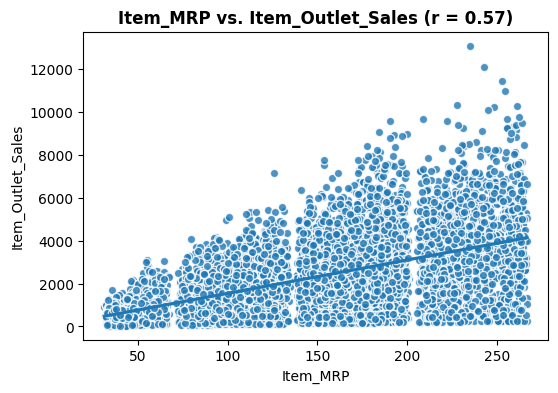

In [403]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature,target);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `yes, correlation is positive moderate > 50 `?
  - Does this feature appear to be a predictor of the target?
    - `yes` ?

___

### Example: {Outlet_Identifier}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  Store ID

In [404]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Identifier"
df[feature].dtype

dtype('O')

<ipython-input-384-bb05217bb22a>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


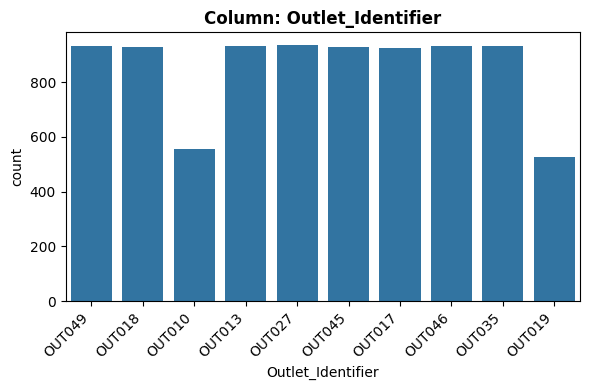

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [405]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - neither

4. What is the cardinality? Is it high?
  - it is on the threshold. so it is high

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



<ipython-input-385-b47f611e8b80>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


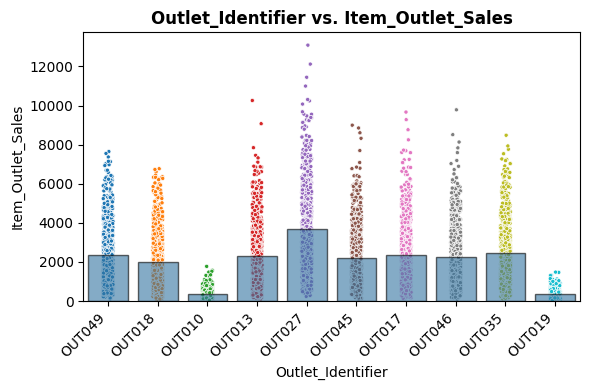

In [406]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,target);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Yes, it seems that out 27 has the highest sales, while 13 and 19 are lowest. thusly, the oulet predicts sales`?
  - Does this feature appear to be a predictor of the target?
    - `yes` ?

___

### Example: {Outlet_Establishment_Year}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
The year in which store was established

In [410]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
df[feature].dtype

dtype('int64')

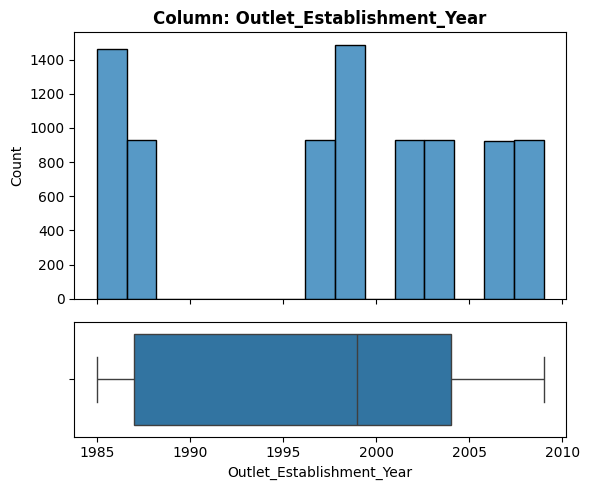

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [411]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - neither

4. What is the cardinality? Is it high?
  -less than 10, not high

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



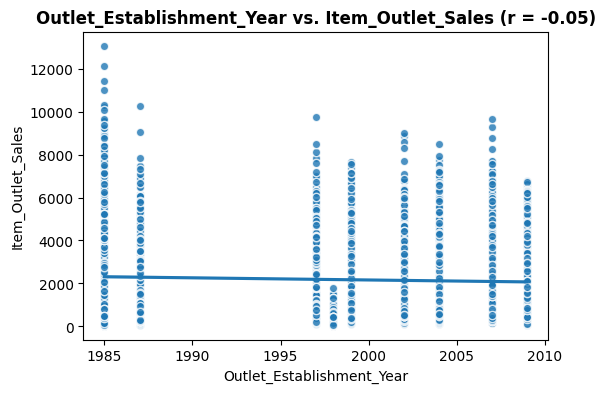

In [412]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature,target);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `   i thought it would be. old houses are more expensive, newer houses are more expensive. but the correlation is very low`?
  - Does this feature appear to be a predictor of the target?
    - `no` ?

___

### Example: {Outlet_Size}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
The size of the store in terms of ground area covered

In [416]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
df[feature].dtype

dtype('O')

<ipython-input-384-bb05217bb22a>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


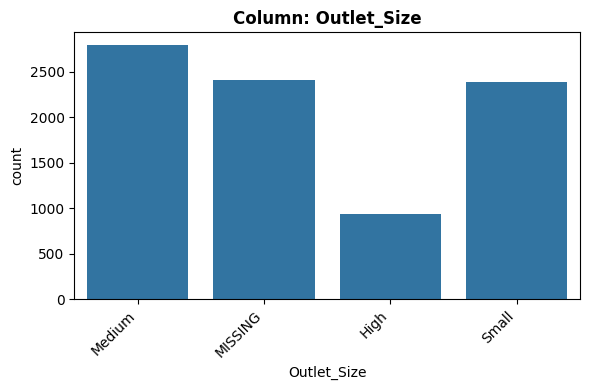

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [417]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -2410 items,  28.28%
  since the percentage of missing data is high, we could drop the whole column

3. Is the feature constant or quasi-constant?
  -neither

4. What is the cardinality? Is it high?
  -low

5. Would we know this BEFORE the target is determined?
  -yes

6. Is there a business case/understanding reason to exclude based on our business case?
  -a lot of missing data, better to drop it



<ipython-input-385-b47f611e8b80>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


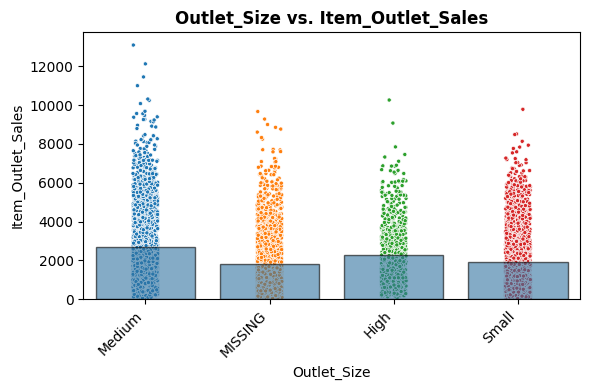

In [419]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,target);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - ` I thought bigger will sell more  `?
  - Does this feature appear to be a predictor of the target?
    - `we can see that the mean is almost the same, without any signficant difference between sizes. so it is not a predictor` ?

___

### Example: {Outlet_Location_Type}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
The type of area in which the store is located

In [420]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
df[feature].dtype

dtype('O')

<ipython-input-384-bb05217bb22a>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


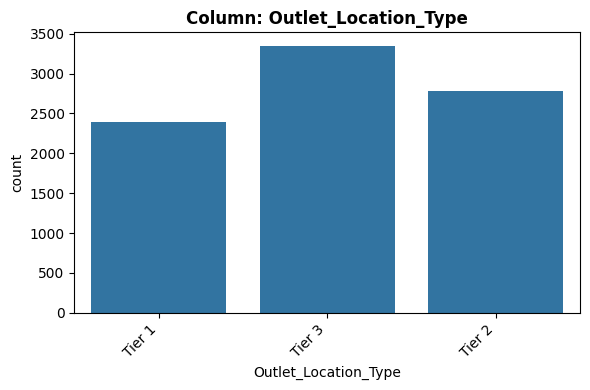

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [421]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -0

3. Is the feature constant or quasi-constant?
  -neither

4. What is the cardinality? Is it high?
  -low

5. Would we know this BEFORE the target is determined?
  -yes

6. Is there a business case/understanding reason to exclude based on our business case?
  -no



<ipython-input-385-b47f611e8b80>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


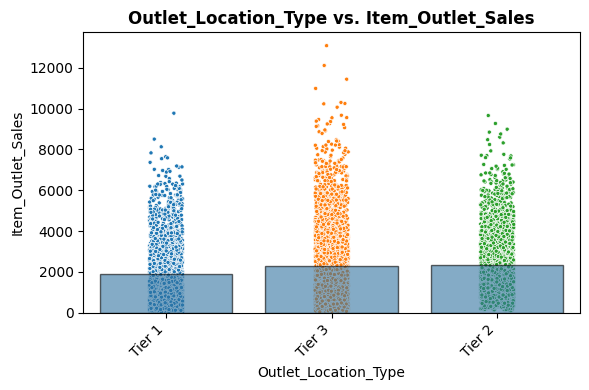

In [422]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,target);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `  it seems that tier 3 has the highest mean and the highest values `?
  - Does this feature appear to be a predictor of the target?
    - `Yes` ?

___